# Initialization bya BNSE for SM kernel

Comparison between initializing sm kernel with different heuristics

* Random
* Lomb Scargle
* BNSE

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk as mogp
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

Create data for the experiment

In [3]:
# data class
data = mogp.Data()

# target freq to estimate
target_freq = 1.0

data.add_function(lambda x: np.sin(target_freq * 2 * np.pi *x), n=1000, start=0.0, end=8.0, var=0.03, name='A')
data.remove_range('A', start=6.0, end=None)

In [4]:
# create model
model = mogp.SM(data, Q=1)

display(model.get_params())

[{'mixture_weights': 0.02535882957826219,
  'mixture_means': array([0.86130599]),
  'mixture_scales': array([0.76028704])}]

In [30]:
# initialize params
model.init_params(method='BNSE')
display(model.get_params())

[{'mixture_weights': 0.701481379589521,
  'mixture_means': array([0.]),
  'mixture_scales': array([0.23985836])}]

In [27]:
model.train(method='Adam', maxiter=1000, disp=False)

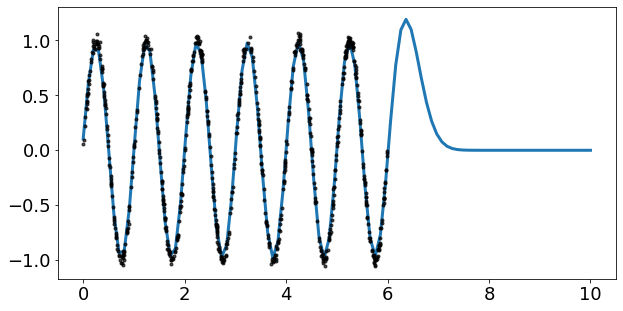

In [29]:
x_pred = {0:np.linspace(0, 10, 100)}
x_pred, y_pred, y_var = model.predict(x_pred)

model.get_params()[0]['mixture_means'][0]

plt.plot(x_pred[0], y_pred[0], label='Pred', lw=3)
plt.plot(data.X[0], data.Y[0], '.k', alpha=0.7)